## 1. Exploratory data analyses

### Sample description 

In [95]:
import folium
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas
import shapely

Disable Pandas SettingWithCopyWarning

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
dataset_chipotle = "./assets/chipotle_stores.csv"

# Load the dataset
chip = pd.read_csv(dataset_chipotle, sep = ',')

In [12]:
chip.head(3)

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437


In [14]:
chip.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,2629.0,37.515979,4.749089,25.479009,33.876535,38.898082,40.813125,48.785206
longitude,2629.0,-92.490287,16.578616,-124.183611,-105.095673,-87.180851,-78.879958,-68.753750


In [16]:
chip.describe(include=('object')).T

,count,unique,top,freq
state,2629,48,California,421
location,2629,1368,New York,52
address,2629,2629,"915 E Oak St Conway, AR 72032 US",1


In [18]:
chip.isnull().sum()

state        0
location     0
address      0
latitude     0
longitude    0
dtype: int64

In [19]:
chip.shape

(2629, 5)

In [20]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      2629 non-null   object 
 1   location   2629 non-null   object 
 2   address    2629 non-null   object 
 3   latitude   2629 non-null   float64
 4   longitude  2629 non-null   float64
dtypes: float64(2), object(3)
memory usage: 102.8+ KB


### Vizualization 

Counts by object variables (states and cities)

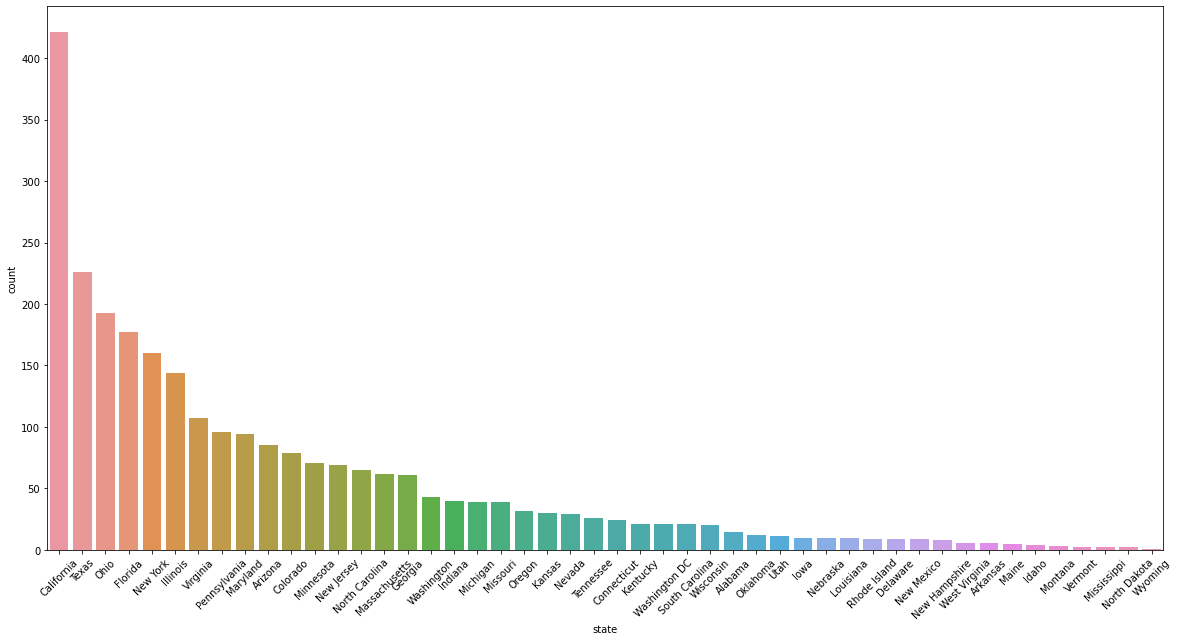

In [26]:
plt.figure(figsize=(20,10))

sns.countplot(x='state', order=chip['state'].value_counts().index, data=chip)
_ = plt.xticks(rotation=45)


In [28]:
len(chip['location'].unique())

1368

In [30]:
chip['location'].value_counts()[:30].index.tolist()

['New York',
 'Chicago',
 'Houston',
 'Columbus',
 'Washington DC',
 'Los Angeles',
 'Dallas',
 'Las Vegas',
 'Phoenix',
 'Cincinnati',
 'Austin',
 'Orlando',
 'Brooklyn',
 'San Diego',
 'Atlanta',
 'Denver',
 'San Jose',
 'Philadelphia',
 'Kansas City',
 'San Antonio',
 'Charlotte',
 'Aurora',
 'Springfield',
 'Sacramento',
 'Baltimore',
 'Pittsburgh',
 'Columbia',
 'Tampa',
 'Miami',
 'Jacksonville']

In [29]:
# Get the name of the 30 first cities
cities_names = chip['location'].value_counts()[:30].index.tolist()

In [31]:
# Filter the dataset: take the 30 most populated cities
chip_cities = chip[chip['location'].isin(cities_names)]

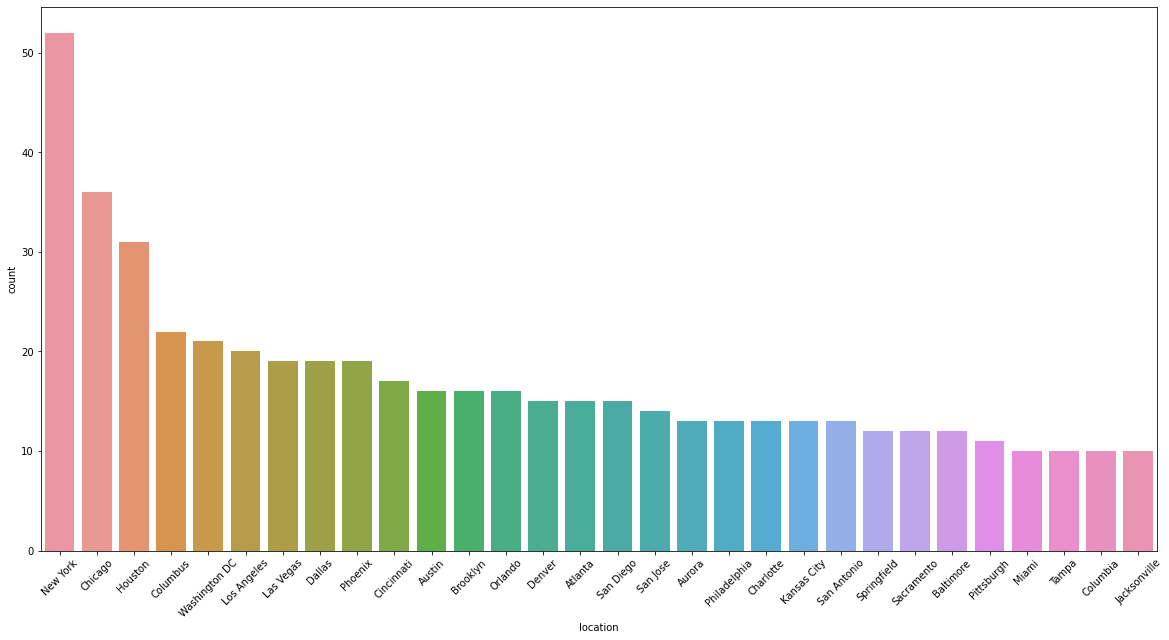

In [33]:
plt.figure(figsize=(20,10))

sns.countplot(x='location', order = chip_cities['location'].value_counts().index, data=chip_cities)
_ = plt.xticks(rotation=45)

In [37]:
# Check california's cities (as most dense state in terms of chipotle facilities)
chip.groupby('state')['location'].value_counts()

state      location        
Alabama    Birmingham          3
           Mobile              2
           Tuscaloosa          2
           Auburn              1
           Cullman             1
                              ..
Wisconsin  Middleton           1
           Mount Pleasant      1
           Pleasant Prairie    1
           Wauwatosa           1
Wyoming    Cheyenne            1
Name: location, Length: 1521, dtype: int64

In [65]:
chip[chip['state']=='California']['location'].value_counts()[:20]

Los Angeles      20
San Diego        15
San Jose         14
Sacramento       12
San Francisco     9
Bakersfield       6
Irvine            5
Fresno            5
Culver City       4
Santa Ana         4
Anaheim           4
Cerritos          3
Oceanside         3
Berkeley          3
Pasadena          3
Mission Viejo     3
Chula Vista       3
Fremont           3
Roseville         3
Santa Clara       3
Name: location, dtype: int64

In [63]:
chip[chip['state']=='California']['location'].value_counts()[:20].index

Index(['Los Angeles', 'San Diego', 'San Jose', 'Sacramento', 'San Francisco',
       'Bakersfield', 'Irvine', 'Fresno', 'Culver City', 'Santa Ana',
       'Anaheim', 'Cerritos', 'Oceanside', 'Berkeley', 'Pasadena',
       'Mission Viejo', 'Chula Vista', 'Fremont', 'Roseville', 'Santa Clara'],
      dtype='object')

In [64]:
chip[chip['state']=='California']['location'].value_counts()[:20].values

array([20, 15, 14, 12,  9,  6,  5,  5,  4,  4,  4,  3,  3,  3,  3,  3,  3,
        3,  3,  3], dtype=int64)

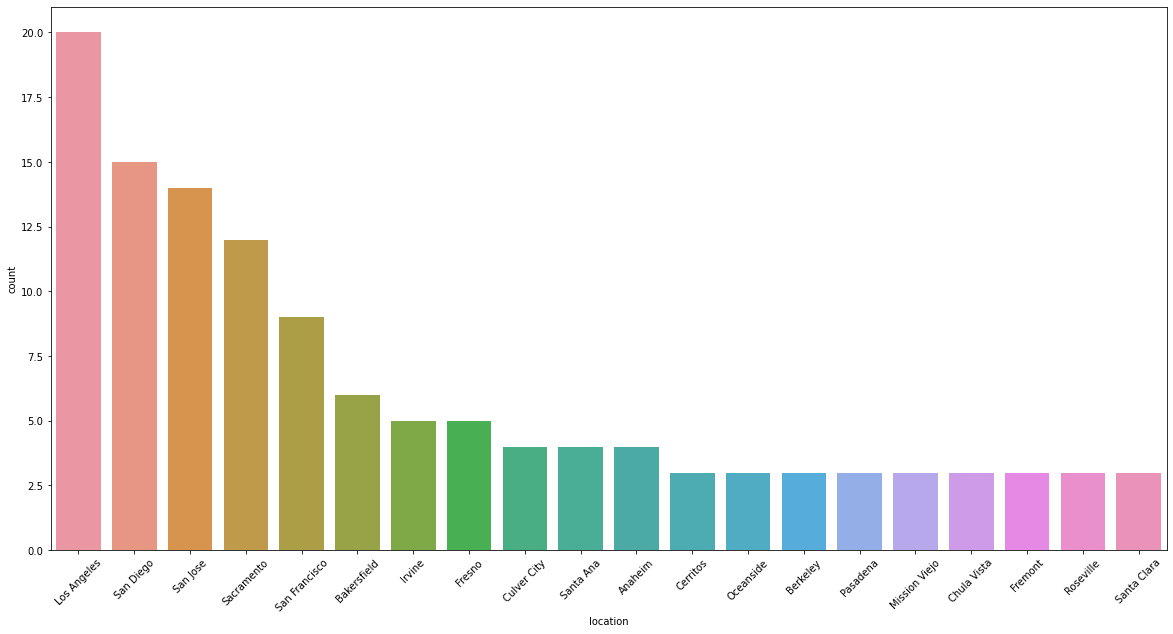

In [68]:
plt.figure(figsize=(20,10))
plt.suptitle=("California's Cities ranked by highest density in Chipotle facilities")
sns.countplot(x='location', order = chip[chip['state']=='California']['location'].value_counts()[:20].index, data=chip[chip['state']=='California'])
_ = plt.xticks(rotation=45)


In [120]:
# Create a folium map, centered on United States
m = folium.Map(
    location=[37.6, -95.665],
    zoom_start=4
)

In [139]:
# Scatterplot all starbucks
_ = chip.apply(lambda row: folium.CircleMarker(location=[row["latitude"], row["longitude"]], radius=0.5, weight=1, color="#006241", fill_color="#006241").add_to(m), axis=1)

In [122]:
m

In [123]:
states = geopandas.read_file('./data/usa-states-census-2014.shp')
type(states)


geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

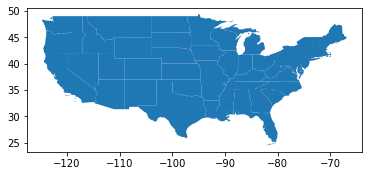

In [124]:
states.plot()


In [127]:
states.head(5)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


<ipython-input-130-22fdccacb2de>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  states.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=9, c='r'),axis=1);


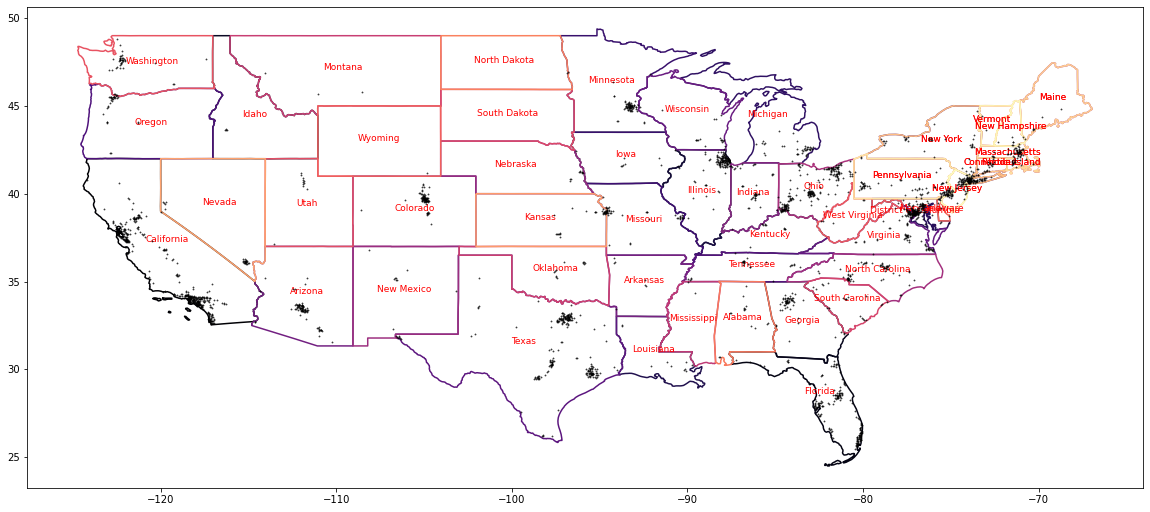

In [130]:
fig, ax = plt.subplots(figsize=(20, 20)) 
states.boundary.plot(cmap='magma', ax=ax)
states.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=9, c='r'),axis=1);

x, y = chip['longitude'].values, chip['latitude'].values
ax.scatter(x,y, marker="*", color='black', alpha=0.7, zorder=5, s=1)



In [133]:
California = states[states['NAME'] == 'California']


In [134]:
California_chip = chip[chip['state'] == 'California']

<ipython-input-137-dc2c57d59dea>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  California.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=40, c='r'),axis=1);


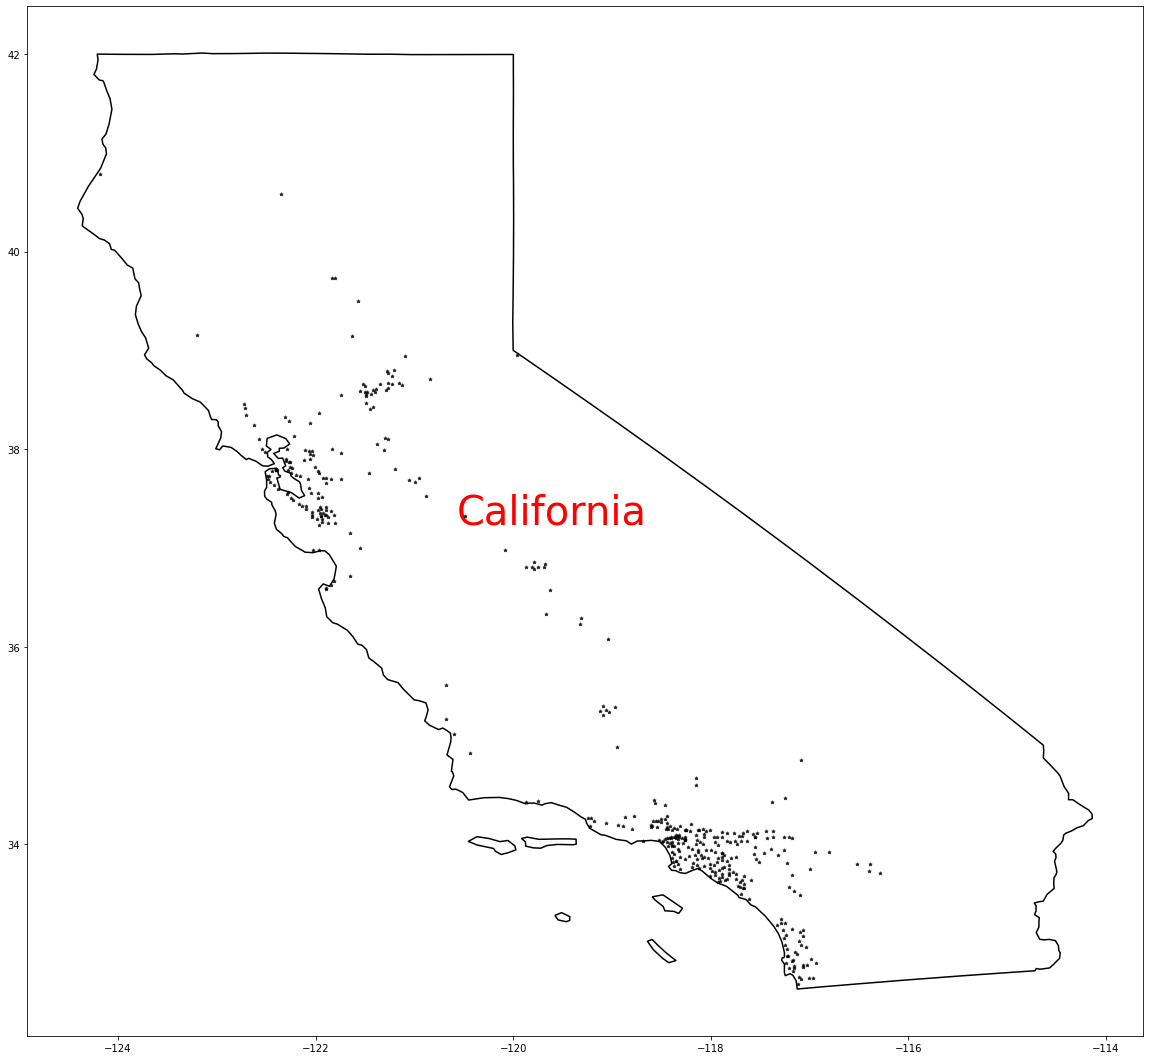

In [137]:
fig, ax = plt.subplots(figsize=(20, 20)) 
California.boundary.plot(cmap='magma', ax=ax)
California.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=40, c='r'),axis=1);

x, y = California_chip['longitude'].values, California_chip['latitude'].values
ax.scatter(x,y, marker="*", color='black', alpha=0.7, zorder=5, s=10)